In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

from jupyterworkflow.data import get_fremont_data
from jupyterworkflow.tests.test_data import test_fremont_data

In [2]:
# !head -20 fremont.csv

In [3]:
data = get_fremont_data()
test_fremont_data()

In [4]:
data.head()

,East,West,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


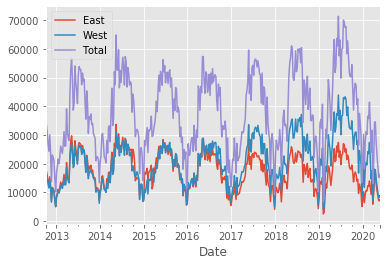

In [5]:
data.resample('W').sum().plot()

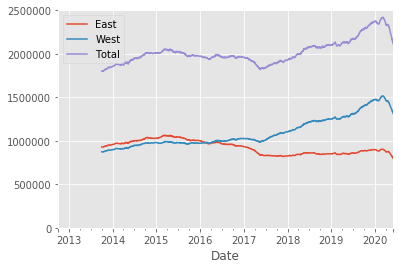

In [6]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None);

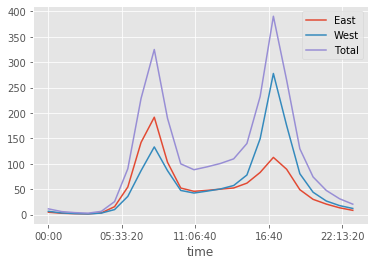

In [7]:
data.groupby(data.index.time).mean().plot();

In [8]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


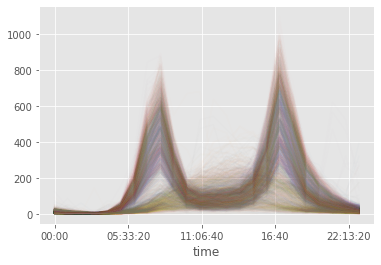

In [9]:
pivoted.plot(legend=False, alpha=0.01);

In [10]:
pivoted.shape, pivoted.T.shape

((24, 2798), (2798, 24))

In [11]:
x = pivoted.fillna(0).T.values
x2 = PCA(2, svd_solver='full').fit_transform(x)

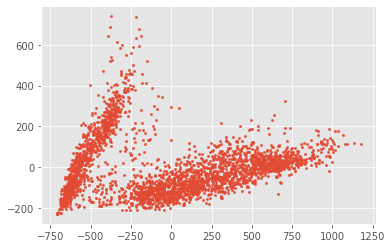

In [12]:
plt.scatter(x2[:,0], x2[:, 1], s=5)

[0 0 0 ... 1 1 1]


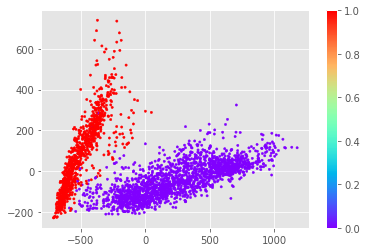

In [13]:
gmm = GaussianMixture(2)
gmm.fit(x)
labels = gmm.predict(x)
print(labels)
plt.scatter(x2[:, 0], x2[:, 1], c=labels, cmap='rainbow', s=5)
plt.colorbar();

In [14]:
pivoted.T[labels==0].shape, pivoted.T[labels==1].shape

((1878, 24), (920, 24))

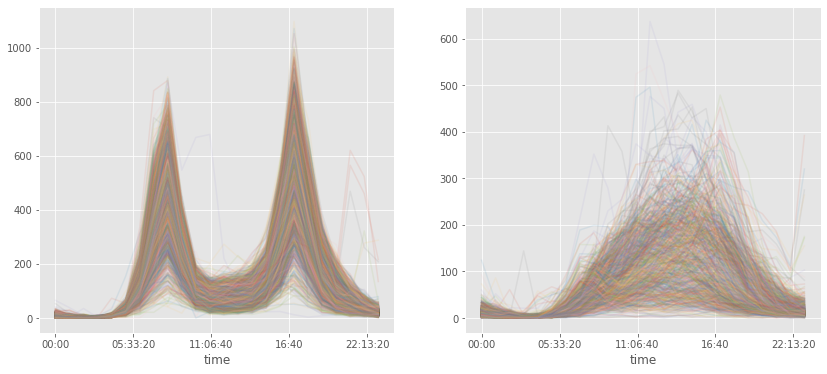

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

pivoted.T[labels==0].T.plot(legend=False, alpha=0.1, ax=ax[0])
pivoted.T[labels==1].T.plot(legend=False, alpha=0.1, ax=ax[1]);

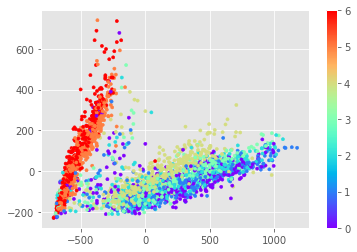

In [16]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
plt.scatter(x2[:, 0], x2[:, 1], c=dayofweek, cmap='rainbow', s=10)
plt.colorbar();

In [17]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 0) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2020-03-05', '2020-03-06', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-16',
               '2020-03-17', '2020-05-20'],
              dtype='datetime64[ns]', length=1873, freq=None)